# CMPE249 - Computer Vision
## 2D Object Detection W/ Yolo V5/V7

My 2D Deep learning based objected detection utilizes the YOLO architecture, specifically Yolo 5s and the latest interation of Yolo 7.

First Step was the training, which ultized resources from the SJSU COE HPC environment. The basic step-up followed the outline steps here: __[HPC Environment Setup Doc](https://docs.google.com/document/d/1GCI5YuP8vpEHGYMngUfdjhMLOrXFpfwJeocSSP7Cl6c/edit)__

Since this is meant to be ran on the HPC, the assumption is that you have your environemnt setup as specified above and you are running Jupyter notebooks server to run this notebook. Also, the server is ran out of the same directory as this project's locaiton.

<b>Note: If there are any issues running this notebook please reach out! All required files and outputs will be saved to verify everything ran as expected.</b>

Let check to make sure we have access to the our GPU cuda resources and the correct Pytorch / Tensor Flow libraries are install:

In [1]:
import tensorflow as tf
import torch

print("Tensor Flow Version: {}".format(tf.__version__))
print("PyTorch Version: {}".format(torch.__version__))
print("Is Cuda available: {}".format(torch.cuda.is_available()))
print("Cuda device count {}".format(torch.cuda.device_count()))
print("Cuda (GPU) device name: {}\n".format(torch.cuda.get_device_name()))

physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)

!nvidia-smi

Tensor Flow Version: 2.3.0
PyTorch Version: 1.7.0+cu101
Is Cuda available: True
Cuda device count 1
Cuda (GPU) device name: Tesla P100-PCIE-12GB

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Sun Nov  6 12:04:44 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:04:00.0 Off |                    0 |
| N/A   30C    P0    26W / 250W |      2MiB / 12198MiB |      0%      Default |
|                               |  

Here we can see that we have access to our GPU node and our libraries are available as required by the assignment.

### DATASET

Dataset Used:
<b>waymotrain200cocoyolo</b>

Waymo dataset (not the latest 1.3.2) converted to YOLO format for 2D object detection


```
path: /data/cmpe249-fa22/waymotrain200cocoyolo  # dataset root dir

train: /data/cmpe249-fa22/waymotrain200cocoyolo/images_train.txt  # train images (relative to 'path') 118287 images

val: /data/cmpe249-fa22/waymotrain200cocoyolo/images_val.txt  # train images (relative to 'path') 5000 images

test: /data/cmpe249-fa22/waymotrain200cocoyolo/images_test.txt  # 20288 of 40670 images, submit to https://competitions.codalab.org/competitions/20794



# Classes
nc: 4  # number of classes
names: ['vehicle', 'pedestrian', 'sign', 'cyclist']  # class names
```


### TRAINING

The models used were trained using the trainHPC.py script provided by Dr. Liu from the following __[Git repository](https://github.com/lkk688/myyolov7)__

You can download the current repository if required to train:

```
!git clone https://github.com/lkk688/myyolov7
```

<b>Warning: For the sake of ease, I kept required libraries needed to load the model for the inference step. If you want to clone and train, please ensure that the models, multi, and utils directories are available (You will need to remove them if you attempt to clone, otherwise proceed). Also, the gpu node will not allow cloning of the repo and this step will have to be completed on a head node. You can then take the trained models and add them to the my_models folder, after renaming, and use the them ad hoc.</b>

NOTE: Pytorch V 1.7.0 was required due to the use of the SilU activation function

I ran both models with the same 'epoch' to see if there was a difference in how fast/better one would train over the other. Also, since the YoloV7 model is significantly more complex and required more VRAM to run, I deviated on the batch size to 16 instead of 60 (HW limitation). In order to 'speed' up processing times I also choose to cache the dataset images to RAM for faster processing.

<code>
python ./trainHPC.py --weights "" --cfg cfg/baseline/yolov5s.yaml --data data/waymococohpc.yaml --epochs 10 --batch-size 60 --name wil_waymo_yolov5 --save_period 1  --cache-images

python trainHPC.py --weights "" --cfg cfg/training/yolov7.yaml --data data/waymococohpc.yaml --epochs 10 --batch-size 16 --name wil_waymo_yolov7 --save_period 1  --cache-images
</code>

### Training Results

### Yolov5s (8hrs)

| Epoch | gpu_mem | box Loss | obj Loss | cls Loss  | total Loss | labels | img_size | Percision | Recall | Map@.5 | Map@.95 | lr0 | lr2 | lr2 |
| :- | :- | :- | :- | :- | :- | :- | :- | :- | :- | :- | :- | :- | :- | :- |
| 0/9 | 10.1G | 0.07647 | 0.02102 | 0.006469 | 0.104 | 1091 | 640 | 0.4154 | 0.06586 | 0.02747 | 0.008745 | 0.1122 | 0.04882 | 0.01642 |
| 1/9 | 10.8G | 0.05974 |  0.01989 | 0.00248 | 0.08212 | 1287 | 640 | 0.7061 | 0.2108 | 0.2305 | 0.09813 | 0.09628 | 0.03899 | 0.01373 |
| 2/9 | 10.9G | 0.05262 | 0.01936 | 0.001926 | 0.0739  | 1276  | 640  | 0.7662 | 0.2662 | 0.3003 | 0.142 | 0.09049  | 0.03814  | 0.01151 |
| 3/9 | 10.9G | 0.04873 | 0.01872 | 0.001691 | 0.06914 | 1032 | 640 | 0.808 | 0.2925 | 0.3404 | 0.17 | 0.08691 | 0.0383 | 0.009888 |
| 4/9  |   10.9G |  0.04681 |  0.01839 | 0.001554 |  0.06675    |   870  |     640  |  0.8142  |  0.3128  |  0.3605  |  0.1861 |  0.08469 |  0.03872 | 0.009057|
| 5/9   |  10.9G  | 0.04539  | 0.01825 | 0.001467  | 0.06511  |     998  |     640  |  0.8255 |   0.3229  |  0.3741  |  0.1976 |  0.08359  | 0.03883 | 0.008678|
| 6/9    | 10.9G |  0.04434  | 0.01802  | 0.00139  | 0.06375   |    841   |    640  |  0.8297  |  0.3325  |  0.3838 |   0.2049  | 0.08278 |  0.03903 | 0.008467|
| 7/9   |  10.9G  | 0.04355  | 0.01776 | 0.001335  | 0.06265  |    1483   |    640  |   0.836  |  0.3356  |  0.3897  |  0.2097 |  0.08234 |  0.03911 | 0.008307|
| 8/9   |  10.9G  | 0.04287  | 0.01758  | 0.001279 |  0.06173  |    1057    |   640  |  0.8289 |   0.3436  |  0.3943   |  0.213  | 0.08193 |  0.03929 | 0.008203|
| 9/9  |   10.9G |  0.04234 |  0.01746 | 0.001231 |  0.06103   |   1004    |   640   | 0.8381  |  0.3429  |  0.3982  |  0.2159 |  0.08161  | 0.03948 | 0.008106|


### Yolov7 (36 hrs)

| Epoch | gpu_mem | box Loss | obj Loss | cls Loss  | total Loss | labels | img_size | Percision | Recall | Map@.5 | Map@.95 | lr0 | lr2 | lr2 |
| :- | :- | :- | :- | :- | :- | :- | :- | :- | :- | :- | :- | :- | :- | :- |
| 0/9  |   7.95G  | 0.07743  | 0.04278  | 0.01382 |    0.134  |     198    |   640  |  0.6745  |  0.2061  |  0.2146  | 0.08339  | 0.09916 |  0.03777  | 0.01265|
|   1/9  |   10.6G |  0.05266  | 0.01851 | 0.002114 |  0.07328   |    130    |   640  |  0.7978   | 0.2839  |  0.3283  |  0.1591 |  0.08769 |  0.03793 |  0.01055 |
|  2/9  |   10.6G  | 0.04588  | 0.01812 | 0.001589 |   0.0656   |    206    |   640  |  0.8316  |  0.3127  |  0.3674  |  0.1894 |  0.08369 |  0.03861 | 0.009957|
|  3/9   |  8.02G |  0.04382 |  0.01797 | 0.001427 |  0.06322  |     198    |   640 |   0.8452 |   0.3379 |   0.3952 |   0.2123  | 0.08068 |  0.04005 | 0.009403|
| 4/9   |  10.7G  | 0.04113  | 0.01759 | 0.001244  | 0.05996  |     130    |   640  |  0.8521 |   0.3539 |   0.4199 |   0.2311 |  0.07875  | 0.04076 | 0.009033|
| 5/9  |   10.7G  | 0.03909 |  0.01712 | 0.001089  |  0.0573  |     206   |    640   | 0.8651 |   0.3601  |  0.4472   |   0.25 |   0.0775 |  0.04139 | 0.008702|
| 6/9  |   8.02G  | 0.03786  | 0.01681 | 0.0009908  | 0.05566   |    198   |    640 |   0.7935   |  0.386  |  0.4643  |  0.2623  | 0.07674  | 0.04176  | 0.008428| 
|  7/9   |    11G  |  0.03794  |  0.01687  | 0.0009726  |  0.05578   |    130  |     640  |  0.7455  |  0.4195  |  0.4772  |  0.2715  | 0.07622 |  0.04201 | 0.008185|
|  8/9  |     11G |  0.03706 |  0.01659 | 0.0008927 |  0.05454   |    206  |     640  |  0.7436  |  0.4304  |  0.4904 |   0.2807  | 0.07568  | 0.04235 | 0.007866|
| 9/9   |  8.02G  | 0.03645  | 0.01642  | 0.0008441  | 0.05372  |     198     |  640  |  0.7604  |  0.4401  |   0.5037  |  0.2895 | 0.07517 |   0.04269  |  0.007487 |

Here we can see that the YoloV7 model preforms better (better Map and Precision/Recall ratios) than YoloV5 at the cost of more processing time and resources due to the higher model complexity.

Total training time of both models took over a week to compute due to figuring out the HPC conops and fixing any related issues.

Models are saved as `yolov5s.pt` and `yolov7.pt`, model type/version as their names imply, in the models folder.

### Inference

Here we will load both yolo models and due a generalized comparison by inspection. Given our training results we can expect that the V7 model should preform better, but let's see if thats true and also lets compare our pipeline processing time.

In [2]:
import time
import os
import cv2
import torch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path
from numpy import random
from models.experimental import attempt_load
from utils.datasets import LoadImages
from utils.general import check_img_size, non_max_suppression, scale_coords, xyxy2xywh
from utils.plots import plot_one_box

%matplotlib inline

device = torch.device('cuda:0')
weights_y7 = os.path.abspath('./my_models/yolov7.pt')
weights_y5 = os.path.abspath('./my_models/yolov5s.pt')

model_v5 = attempt_load(weights_y5, map_location=device)
model_v7 = attempt_load(weights_y7, map_location=device)

My model file: /home/015288325/repos/2D_HPC_Implementation/my_models/yolov5s.pt


Model Summary: 213 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPS


Fusing layers... 
My model file: /home/015288325/repos/2D_HPC_Implementation/my_models/yolov7.pt
Fusing layers... 


Model Summary: 314 layers, 36497954 parameters, 6194944 gradients, 103.2 GFLOPS


RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse


Both models are loadded up, we can see that the complexity of these two models are significally different, with the later being the Yolo v7 model.

In [3]:
def inferrence_yolo(model, model_name):

    save_dir = Path(Path('./inferrence_tryout') / model_name, exist_ok=True) 
    (save_dir).mkdir(parents=True, exist_ok=True)

    stride = int(model.stride.max())
    imgsz = check_img_size(640, s=stride)

    print(stride)
    print(imgsz)

    if device.type != 'cpu':
        model.half()  # to FP16

    source = os.path.abspath('./test_images')
    dataset = LoadImages(source, img_size=imgsz, stride=stride)
    names = model.module.names if hasattr(model, 'module') else model.names
    colors = [[random.randint(0, 255) for _ in range(3)] for _ in names]

    if device.type != 'cpu':
        model(torch.zeros(1, 3, imgsz, imgsz).to(device).type_as(next(model.parameters())))  # run once
    t0 = time.time()

    for path, img, im0s, vid_cap in dataset:
        start = time.time()
        img = torch.from_numpy(img).to(device).half()
        img /= 255.0
        if img.ndimension() == 3:
            img = img.unsqueeze(0)

        # Inference
        t1 = time.time()
        pred = model(img, augment=False)[0]
        t2 = time.time()

        #NMS
        t3 = time.time()
        pred = non_max_suppression(pred, 0.25, 0.45, classes=None, agnostic=False)
        t4 = time.time()

        # Process detections
        for i, det in enumerate(pred):
            p, s, im0, frame = path, '', im0s, getattr(dataset, 'frame', 0)

            p = Path(p)
            save_path = str(save_dir / p.name)  # img.jpg
            s += '%gx%g ' % img.shape[2:]  # print string

            if len(det):
                # Rescale boxes from img_size to im0 size
                det[:, :4] = scale_coords(img.shape[2:], det[:, :4], im0.shape).round()

                # Write results
                for *xyxy, conf, cls in reversed(det):
                    label = f'{names[int(cls)]} {conf:.2f}'
                    plot_one_box(xyxy, im0, label=label, color=colors[int(cls)], line_thickness=3)
            else:
                continue # Don't save anything images that don't have detections or show them

            # Save results (image with detections)
            cv2.imwrite(save_path, im0)
            print("\nThe image with the result is saved in: {}".format(save_path))

            # Plot the images for easy analysis        
            img_print = mpimg.imread(save_path)
            imgplot = plt.imshow(img_print)
            plt.show()
            
            end = time.time()

            print("Per Image Inferrence Time: {:.3f}".format(t2 - t1))
            print("Per Image Non-Maximum Suppression Time: {:.3f}".format(t4 - t3))
            print("Per Image Pipeline Time: {:.3f}".format(end - start))

    print("\n\nTotal Pipeline Time: {:.3f}".format(time.time() - t0))

32
640

The image with the result is saved in: inferrence_tryout/YoloV5/Google-Street-View-overlay-2.jpg


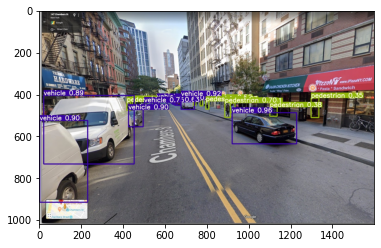

Per Image Inferrence Time: 0.020
Per Image Non-Maximum Suppression Time: 0.645
Per Image Pipeline Time: 1.450

The image with the result is saved in: inferrence_tryout/YoloV5/bicycles.jpg


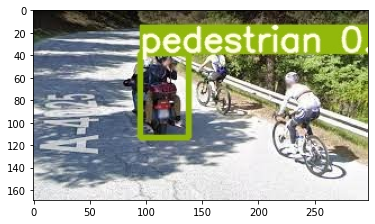

Per Image Inferrence Time: 0.012
Per Image Non-Maximum Suppression Time: 0.004
Per Image Pipeline Time: 0.175

The image with the result is saved in: inferrence_tryout/YoloV5/bus.jpg


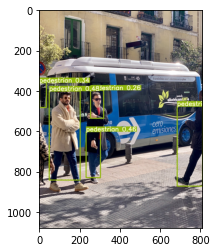

Per Image Inferrence Time: 0.011
Per Image Non-Maximum Suppression Time: 0.001
Per Image Pipeline Time: 0.230

The image with the result is saved in: inferrence_tryout/YoloV5/cyclist_fail.jpg


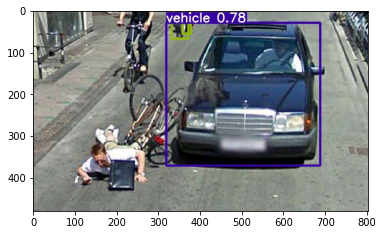

Per Image Inferrence Time: 0.012
Per Image Non-Maximum Suppression Time: 0.001
Per Image Pipeline Time: 0.204

The image with the result is saved in: inferrence_tryout/YoloV5/cyclists.jpg


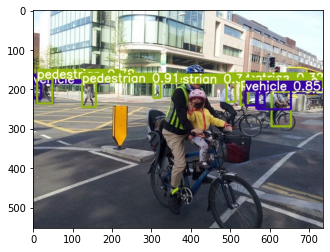

Per Image Inferrence Time: 0.012
Per Image Non-Maximum Suppression Time: 0.001
Per Image Pipeline Time: 0.209

The image with the result is saved in: inferrence_tryout/YoloV5/france.png


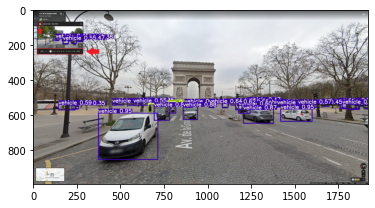

Per Image Inferrence Time: 0.011
Per Image Non-Maximum Suppression Time: 0.001
Per Image Pipeline Time: 0.543

The image with the result is saved in: inferrence_tryout/YoloV5/oncomingtruck.jpg


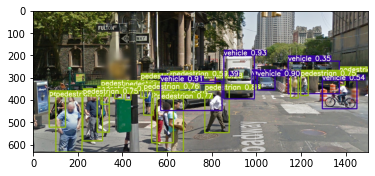

Per Image Inferrence Time: 0.012
Per Image Non-Maximum Suppression Time: 0.001
Per Image Pipeline Time: 0.264

The image with the result is saved in: inferrence_tryout/YoloV5/original.jpg


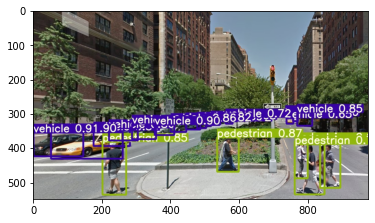

Per Image Inferrence Time: 0.011
Per Image Non-Maximum Suppression Time: 0.001
Per Image Pipeline Time: 0.243

The image with the result is saved in: inferrence_tryout/YoloV5/stop.jpg


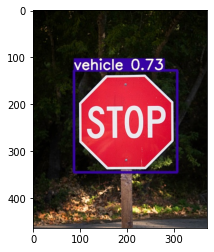

Per Image Inferrence Time: 0.012
Per Image Non-Maximum Suppression Time: 0.003
Per Image Pipeline Time: 0.156

The image with the result is saved in: inferrence_tryout/YoloV5/street_kids.jpg


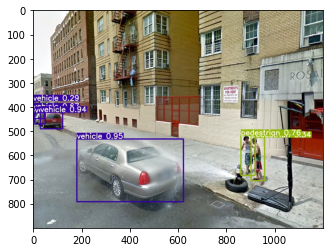

Per Image Inferrence Time: 0.014
Per Image Non-Maximum Suppression Time: 0.002
Per Image Pipeline Time: 0.300

The image with the result is saved in: inferrence_tryout/YoloV5/street_sign.jpg


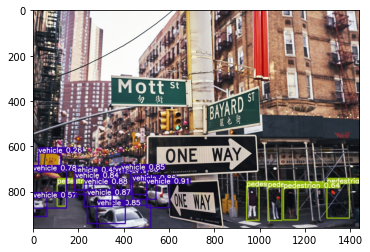

Per Image Inferrence Time: 0.012
Per Image Non-Maximum Suppression Time: 0.001
Per Image Pipeline Time: 0.328


Total Pipeline Time: 4.356


In [4]:
# Lets Run a yolo v5 inferrence
inferrence_yolo(model_v5, "YoloV5")

The model worked well enough given that test results we noted earlier in the training. It seems that vehicles and pedestrians are marked but it has trouble detecting bicyles and pedestrian groups. Lets see if we did better with v7

32
640

The image with the result is saved in: inferrence_tryout/YoloV7/Google-Street-View-overlay-2.jpg


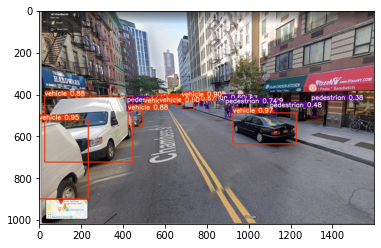

Per Image Inferrence Time: 0.028
Per Image Non-Maximum Suppression Time: 0.002
Per Image Pipeline Time: 0.373

The image with the result is saved in: inferrence_tryout/YoloV7/bicycles.jpg


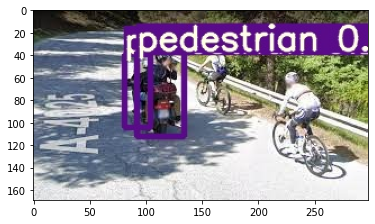

Per Image Inferrence Time: 0.028
Per Image Non-Maximum Suppression Time: 0.002
Per Image Pipeline Time: 0.191

The image with the result is saved in: inferrence_tryout/YoloV7/bus.jpg


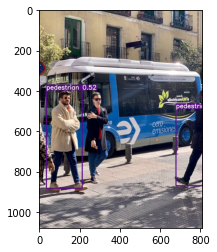

Per Image Inferrence Time: 0.029
Per Image Non-Maximum Suppression Time: 0.001
Per Image Pipeline Time: 0.269

The image with the result is saved in: inferrence_tryout/YoloV7/cyclist_fail.jpg


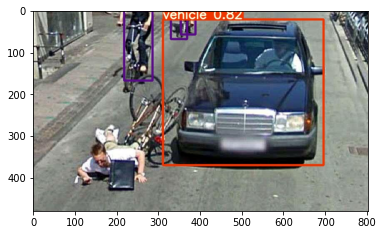

Per Image Inferrence Time: 0.029
Per Image Non-Maximum Suppression Time: 0.002
Per Image Pipeline Time: 0.238

The image with the result is saved in: inferrence_tryout/YoloV7/cyclists.jpg


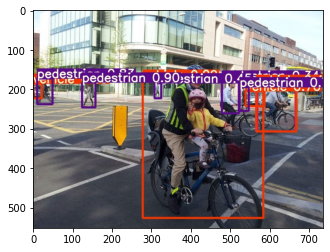

Per Image Inferrence Time: 0.032
Per Image Non-Maximum Suppression Time: 0.003
Per Image Pipeline Time: 0.268

The image with the result is saved in: inferrence_tryout/YoloV7/france.png


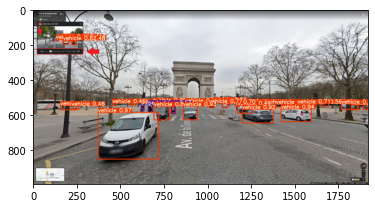

Per Image Inferrence Time: 0.027
Per Image Non-Maximum Suppression Time: 0.002
Per Image Pipeline Time: 0.573

The image with the result is saved in: inferrence_tryout/YoloV7/oncomingtruck.jpg


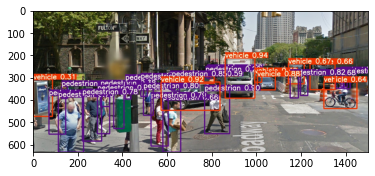

Per Image Inferrence Time: 0.027
Per Image Non-Maximum Suppression Time: 0.002
Per Image Pipeline Time: 0.290

The image with the result is saved in: inferrence_tryout/YoloV7/original.jpg


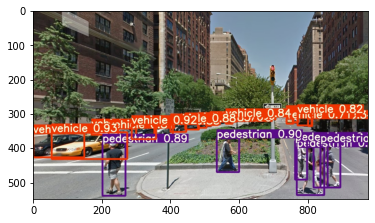

Per Image Inferrence Time: 0.028
Per Image Non-Maximum Suppression Time: 0.002
Per Image Pipeline Time: 0.469

The image with the result is saved in: inferrence_tryout/YoloV7/stop.jpg


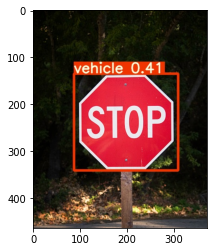

Per Image Inferrence Time: 0.029
Per Image Non-Maximum Suppression Time: 0.002
Per Image Pipeline Time: 0.174

The image with the result is saved in: inferrence_tryout/YoloV7/street_kids.jpg


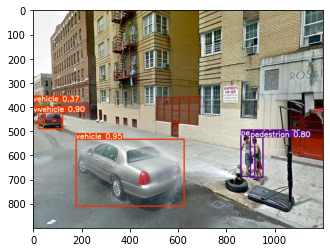

Per Image Inferrence Time: 0.029
Per Image Non-Maximum Suppression Time: 0.002
Per Image Pipeline Time: 0.325

The image with the result is saved in: inferrence_tryout/YoloV7/street_sign.jpg


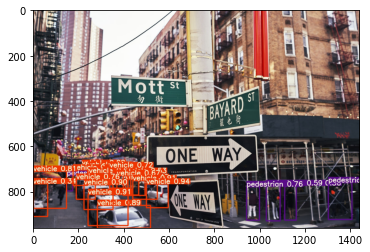

Per Image Inferrence Time: 0.029
Per Image Non-Maximum Suppression Time: 0.002
Per Image Pipeline Time: 0.328


Total Pipeline Time: 3.701


In [5]:
# Lets Run a yolo v7 inferrence
inferrence_yolo(model_v7, "YoloV7")

The model worked well, as observed from the test results. Vehicles, pedestrians, and cyclists are marked better than v5 which is to be expected given that the model's training statistic predicted it would be and we can cleary compare the same imgages from both. One thing to note was the speed as which each model was doing its inferrence and NMS. The bottleneck appears in processing and saving the images to be evaluated but this can be increased with better coding and/or frameworks in C/C++ (TensorRT | TorchRT). It would make sense to use the better model, V7 since the performance is better at little cost to time. Also, traffic signs and cyclists were hard for both models to track so it could be that we need more data on these specific types and an increase of training epochs will greatly benefit the results we are seeing.